In [4]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('C:\\Users\\tamba\\Downloads\\MLPractices-master\\DataScience-Assignments-Narendra\\10. KNN\\glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:
X = np.array(data.iloc[:,3:5])
y = np.array(data['Type'])

In [7]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

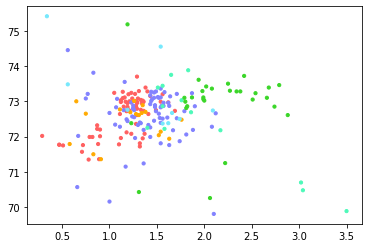

In [8]:
# Create color maps
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

In [9]:
# creating training set, test set
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

In [10]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Predicting results using KNN fit. 
pred = knn.predict(X_train)
pred

array([2, 2, 2, 5, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 7, 2, 5, 1, 2, 3, 7, 2, 1, 2, 2, 7, 1, 1, 5, 2, 2, 5, 2, 7, 1,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 7, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 1, 7, 1, 7, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2,
       3, 1, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2, 7, 1, 2, 1, 1, 7, 7, 7, 2, 2,
       7, 2, 2, 2, 5, 2, 2, 2, 1, 2, 7, 2, 1, 1, 2, 6, 2, 6, 7, 1, 1, 1,
       7, 1, 1, 1, 2, 2, 1, 1, 2, 7, 3, 2, 2, 7, 2, 7, 1, 1, 2, 2, 6, 2,
       2, 2, 1, 2, 2, 2], dtype=int64)

In [12]:
# Check accuracy
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.73125


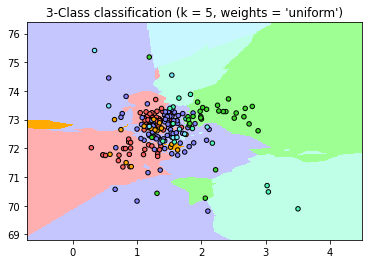

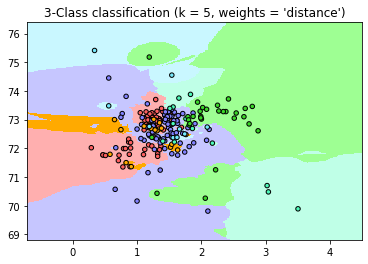

In [13]:
# plotting the decision boundries for the data 

h = .02  # step size in the mesh
n_neighbors = 5 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_dark,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()